In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [16]:
import pandas as pd
import numpy as np
# 1. Load the Dataset

df = pd.read_csv('/content/diabetes.csv')

# Display the first few rows and basic info
print("First few rows of the dataset:")
df.head()



First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("\nData types and non-null counts:")
df.info()
print("\n")

print("\nSummary statistics:")
df.describe()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# 2. Handle Missing Data
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:

# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Calculate the test split size
test_size = 0.3
test_split_size = int(len(X) * test_size)

# Perform the train-test split without shuffle
X_train = X.iloc[test_split_size:]  # Take the first (1 - test_size) fraction for training
X_test = X.iloc[:test_split_size]  # Take the remaining fraction for testing
y_train = y.iloc[test_split_size:]
y_test = y.iloc[:test_split_size]

# Print the output shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [22]:
#KNN Algorithm
#Compute Euclidean Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Predict Class for a Single Query
def predict_single(X_train, y_train, query, k):
    distances = []
    # Compute distances from query to all training samples
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], query)
        distances.append((distance, y_train[i]))
    # Sort by distance and select k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    # Get the most common class among neighbors
    classes = [neighbor[1] for neighbor in k_nearest_neighbors]
    predicted_class = max(set(classes), key=classes.count)
    return predicted_class

#Predict Classes for All Test Samples
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test:
        predicted_class = predict_single(X_train, y_train, query, k)
        predictions.append(predicted_class)
    return predictions
#evaluate accuracy
def accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return correct / len(y_true)



#Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:
– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

In [23]:
import numpy as np

#Dataset
X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[2, 2], [5, 5], [7, 7]])
y_test = np.array([0, 0, 1])

#Scale the data (min-max scaling)
def min_max_scale(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

X_train_scaled = min_max_scale(X_train)
X_test_scaled = min_max_scale(X_test)

# Step 3: Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 4: kNN classification
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test:
        distances = []
        for i in range(len(X_train)):
            distance = euclidean_distance(X_train[i], query)
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        classes = [neighbor[1] for neighbor in k_nearest_neighbors]
        predicted_class = max(set(classes), key=classes.count)
        predictions.append(predicted_class)
    return predictions

# Step 5: Predict and evaluate
k = 3
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)

# Accuracy calculation
def accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return correct / len(y_true)

acc_scaled = accuracy(y_test, y_pred_scaled)

# Results
print("Scaled X_train:\n", X_train_scaled)
print("Scaled X_test:\n", X_test_scaled)
print("Predictions (scaled data):", y_pred_scaled)
print("Accuracy (scaled data):", acc_scaled)


Scaled X_train:
 [[0.         0.        ]
 [0.14285714 0.16666667]
 [0.28571429 0.16666667]
 [0.71428571 0.66666667]
 [0.85714286 1.        ]
 [1.         1.        ]]
Scaled X_test:
 [[0.  0. ]
 [0.6 0.6]
 [1.  1. ]]
Predictions (scaled data): [0, 1, 1]
Accuracy (scaled data): 0.6666666666666666


#Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:
k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [37]:

import time
import matplotlib.pyplot as plt

# Define datasets (assuming already prepared)
X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[2, 2], [5, 5], [7, 7]])
y_test = np.array([0, 0, 1])

# Scale data
def min_max_scale(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

X_train_scaled = min_max_scale(X_train)
X_test_scaled = min_max_scale(X_test)

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# kNN prediction
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test:
        distances = []
        for i in range(len(X_train)):
            distance = euclidean_distance(X_train[i], query)
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        classes = [neighbor[1] for neighbor in k_nearest_neighbors]
        predicted_class = max(set(classes), key=classes.count)
        predictions.append(predicted_class)
    return predictions
# Accuracy calculation
def accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return correct / len(y_true)

# Test k values and record results
k_values = range(1, 16)
results_original = []
results_scaled = []

for k in k_values:
    # Measure time and accuracy for original dataset
    start_time = time.time()
    y_pred = predict_all(X_train, y_train, X_test, k)
    elapsed_time = time.time() - start_time
    acc = accuracy(y_test, y_pred)
    results_original.append((k, acc, elapsed_time))
    print(f"k={k}, Accuracy: {acc}, Time: {elapsed_time} seconds")
    print("\n")

    # Measure time and accuracy for scaled dataset
    start_time = time.time()
    y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    elapsed_time_scaled = time.time() - start_time
    acc_scaled = accuracy(y_test, y_pred_scaled)
    results_scaled.append((k, acc_scaled, elapsed_time_scaled))
    print(f"k={k}, Scaled Accuracy: {acc_scaled}, Time: {elapsed_time_scaled} seconds")

print("Result of Original Data:")
results_original

print("Result of Scaled Data:")
results_scaled



k=1, Accuracy: 0.6666666666666666, Time: 0.0003457069396972656 seconds


k=1, Scaled Accuracy: 0.6666666666666666, Time: 0.00029754638671875 seconds
k=2, Accuracy: 1.0, Time: 0.0002963542938232422 seconds


k=2, Scaled Accuracy: 0.6666666666666666, Time: 0.00024318695068359375 seconds
k=3, Accuracy: 1.0, Time: 0.00022649765014648438 seconds


k=3, Scaled Accuracy: 0.6666666666666666, Time: 0.00028324127197265625 seconds
k=4, Accuracy: 1.0, Time: 0.00020074844360351562 seconds


k=4, Scaled Accuracy: 0.6666666666666666, Time: 0.0002295970916748047 seconds
k=5, Accuracy: 0.6666666666666666, Time: 0.00017714500427246094 seconds


k=5, Scaled Accuracy: 0.6666666666666666, Time: 0.00025916099548339844 seconds
k=6, Accuracy: 0.6666666666666666, Time: 0.00018453598022460938 seconds


k=6, Scaled Accuracy: 0.6666666666666666, Time: 0.00015854835510253906 seconds
k=7, Accuracy: 0.6666666666666666, Time: 0.00016951560974121094 seconds


k=7, Scaled Accuracy: 0.6666666666666666, Time: 0.000249862

[(1, 0.6666666666666666, 0.00029754638671875),
 (2, 0.6666666666666666, 0.00024318695068359375),
 (3, 0.6666666666666666, 0.00028324127197265625),
 (4, 0.6666666666666666, 0.0002295970916748047),
 (5, 0.6666666666666666, 0.00025916099548339844),
 (6, 0.6666666666666666, 0.00015854835510253906),
 (7, 0.6666666666666666, 0.0002498626708984375),
 (8, 0.6666666666666666, 0.00016927719116210938),
 (9, 0.6666666666666666, 0.00025343894958496094),
 (10, 0.6666666666666666, 0.00019288063049316406),
 (11, 0.6666666666666666, 0.0002040863037109375),
 (12, 0.6666666666666666, 0.00016379356384277344),
 (13, 0.6666666666666666, 0.0002262592315673828),
 (14, 0.6666666666666666, 0.0003654956817626953),
 (15, 0.6666666666666666, 0.00020170211791992188)]

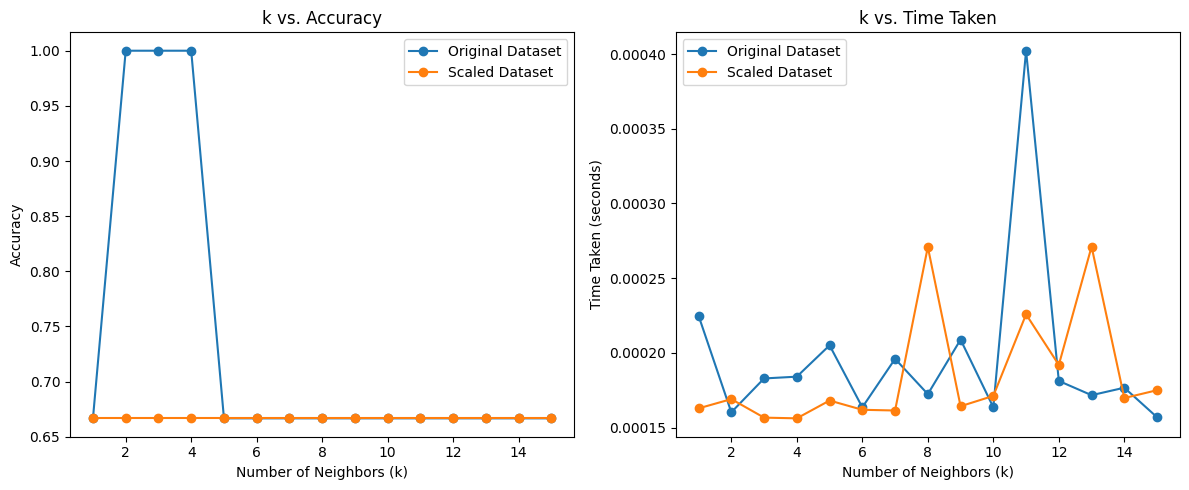

In [35]:
# Extract data for plotting without using zip
k_original = [result[0] for result in results_original]
acc_original = [result[1] for result in results_original]
time_original = [result[2] for result in results_original]

k_scaled = [result[0] for result in results_scaled]
acc_scaled = [result[1] for result in results_scaled]
time_scaled = [result[2] for result in results_scaled]

# Plot k vs. Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_original, acc_original, label="Original Dataset", marker='o')
plt.plot(k_scaled, acc_scaled, label="Scaled Dataset", marker='o')
plt.title("k vs. Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()

# Plot k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_original, time_original, label="Original Dataset", marker='o')
plt.plot(k_scaled, time_scaled, label="Scaled Dataset", marker='o')
plt.title("k vs. Time Taken")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.legend()

plt.tight_layout()
plt.show()
